In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [121]:
data=pd.read_csv('C:\Data Scientist Internship Projects\Telecom_customer_churn.csv')

In [122]:
pd.get_option("display.max_columns")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [123]:
data.shape

(7043, 21)

In [124]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [127]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [128]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['PaymentMethod'],data['Churn'], margins=True)

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
All,5174,1869,7043


In [129]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['PaperlessBilling'],data['Churn'], margins=True)

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


In [130]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['Contract'],data['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [131]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['StreamingMovies'],data['Churn'], margins=True)

Churn,No,Yes,All
StreamingMovies,,,
No,1847,938,2785
No internet service,1413,113,1526
Yes,1914,818,2732
All,5174,1869,7043


In [132]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['StreamingTV'],data['Churn'], margins=True)

Churn,No,Yes,All
StreamingTV,,,
No,1868,942,2810
No internet service,1413,113,1526
Yes,1893,814,2707
All,5174,1869,7043


In [133]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['TechSupport'],data['Churn'], margins=True)

Churn,No,Yes,All
TechSupport,,,
No,2027,1446,3473
No internet service,1413,113,1526
Yes,1734,310,2044
All,5174,1869,7043


In [134]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['PhoneService'],data['Churn'], margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


In [135]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['InternetService'],data['Churn'], margins=True)

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


In [136]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['DeviceProtection'],data['Churn'], margins=True)

Churn,No,Yes,All
DeviceProtection,,,
No,1884,1211,3095
No internet service,1413,113,1526
Yes,1877,545,2422
All,5174,1869,7043


In [137]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['OnlineBackup'],data['Churn'], margins=True)

Churn,No,Yes,All
OnlineBackup,,,
No,1855,1233,3088
No internet service,1413,113,1526
Yes,1906,523,2429
All,5174,1869,7043


In [138]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['OnlineSecurity'],data['Churn'], margins=True)

Churn,No,Yes,All
OnlineSecurity,,,
No,2037,1461,3498
No internet service,1413,113,1526
Yes,1724,295,2019
All,5174,1869,7043


In [139]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['PhoneService'],data['Churn'], margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


In [140]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['MultipleLines'],data['Churn'], margins=True)

Churn,No,Yes,All
MultipleLines,,,
No,2541,849,3390
No phone service,512,170,682
Yes,2121,850,2971
All,5174,1869,7043


In [141]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['gender'],data['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [142]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['Dependents'],data['Churn'], margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


In [143]:
## No Direct Relation with Churn (not ordinal categories data)
pd.crosstab(data['Partner'],data['Churn'], margins=True)

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [144]:
## As Customer Id has not any significance in prediction and Monthly Charges are a part of total charges
data=data.drop(['customerID','MonthlyCharges'],axis=1)

In [145]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [146]:
## Change Total charges to float type data
data['TotalCharges']=data['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [148]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [149]:
## i convert it by label encoding

In [150]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [159]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges        11
Churn                0
dtype: int64

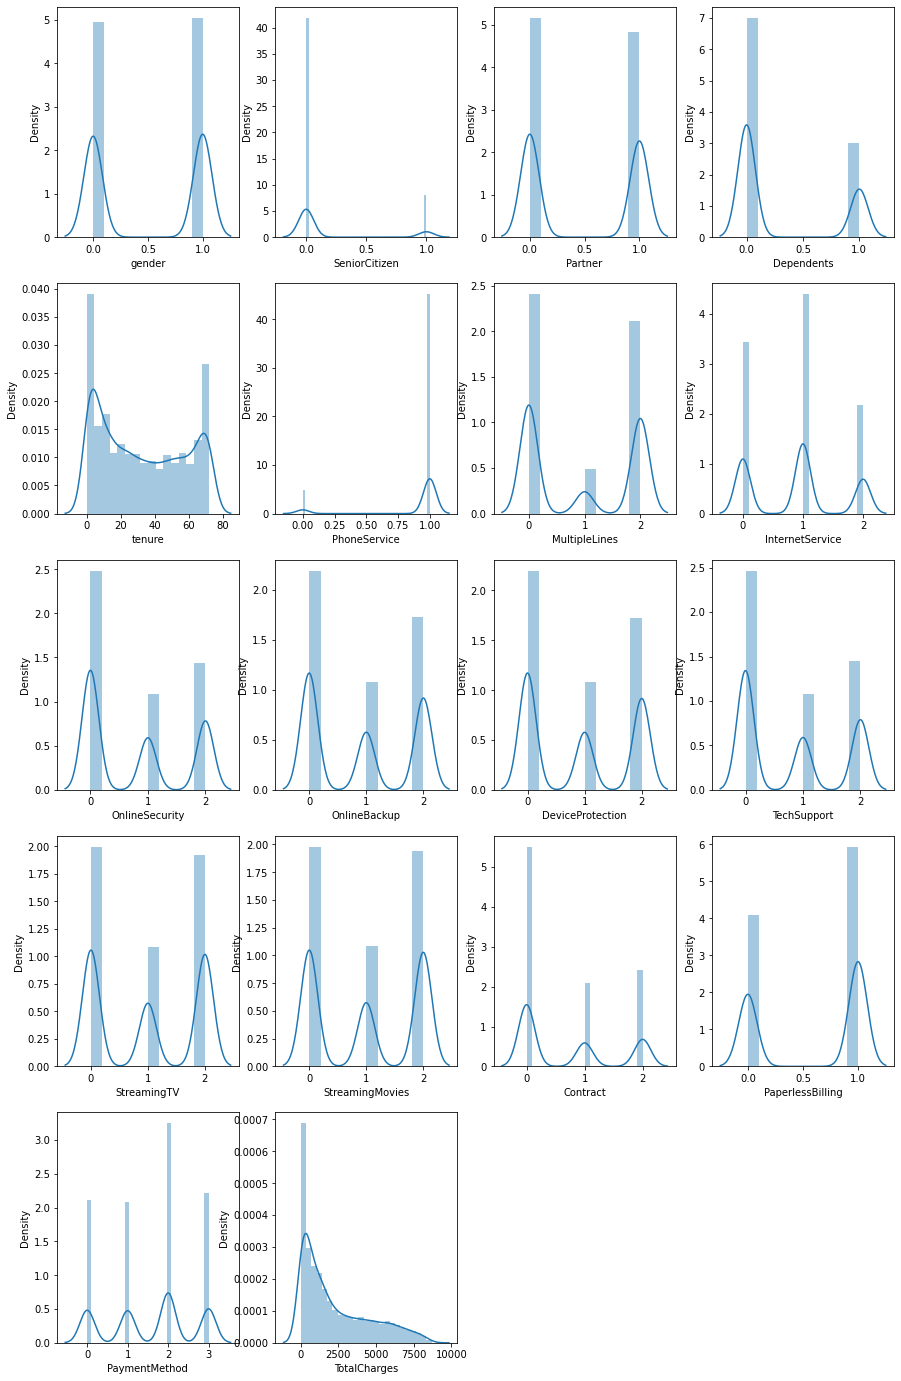

In [165]:
## for showing the skewness
plt.figure(figsize=(15,50))
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [174]:
data['TotalCharges']=data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [175]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

In [230]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
TotalCharges        0.962394
Churn               1.063031
dtype: float64

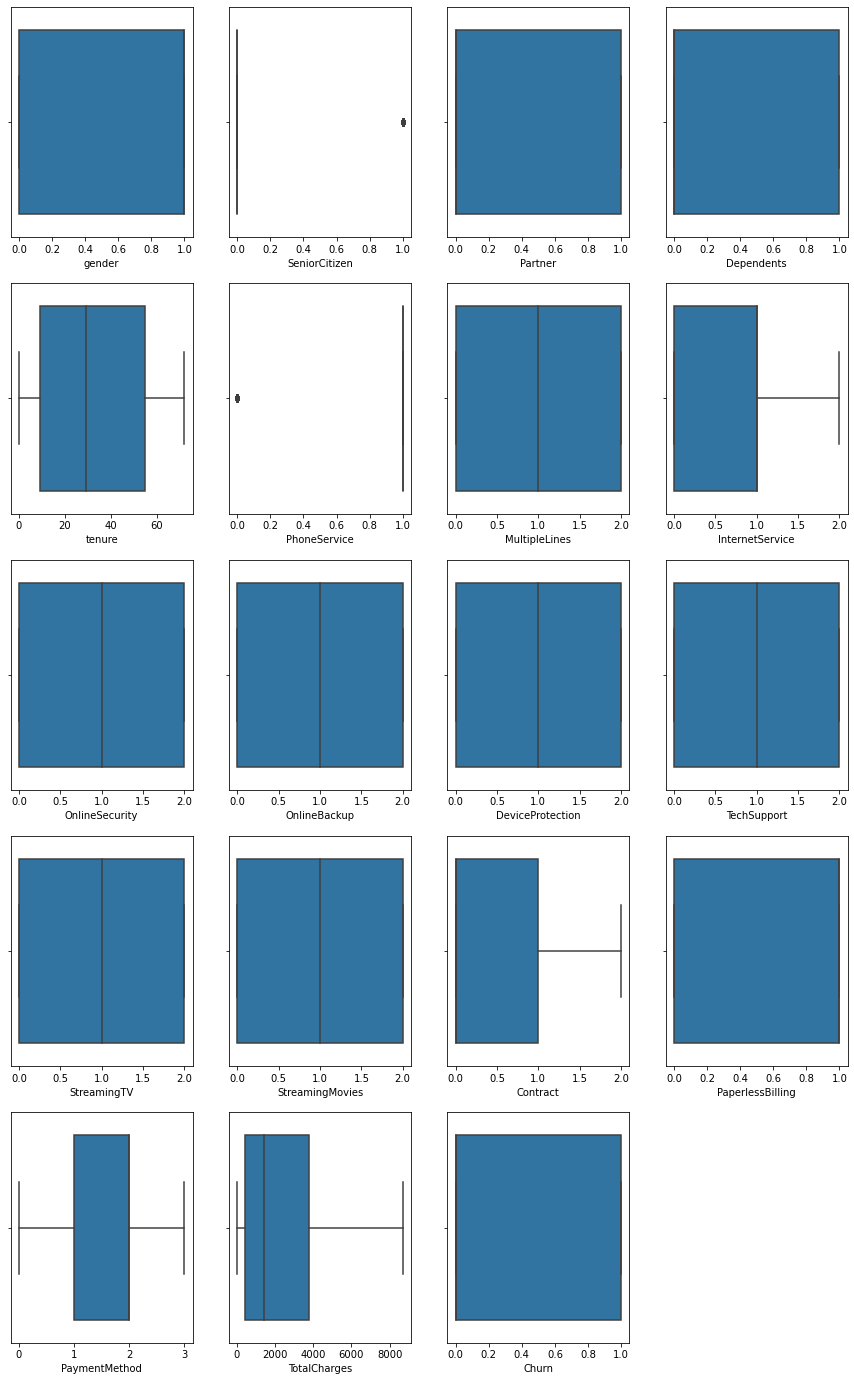

In [163]:
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=27:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [104]:
## There are Mostly no outliers in data hence proceed further

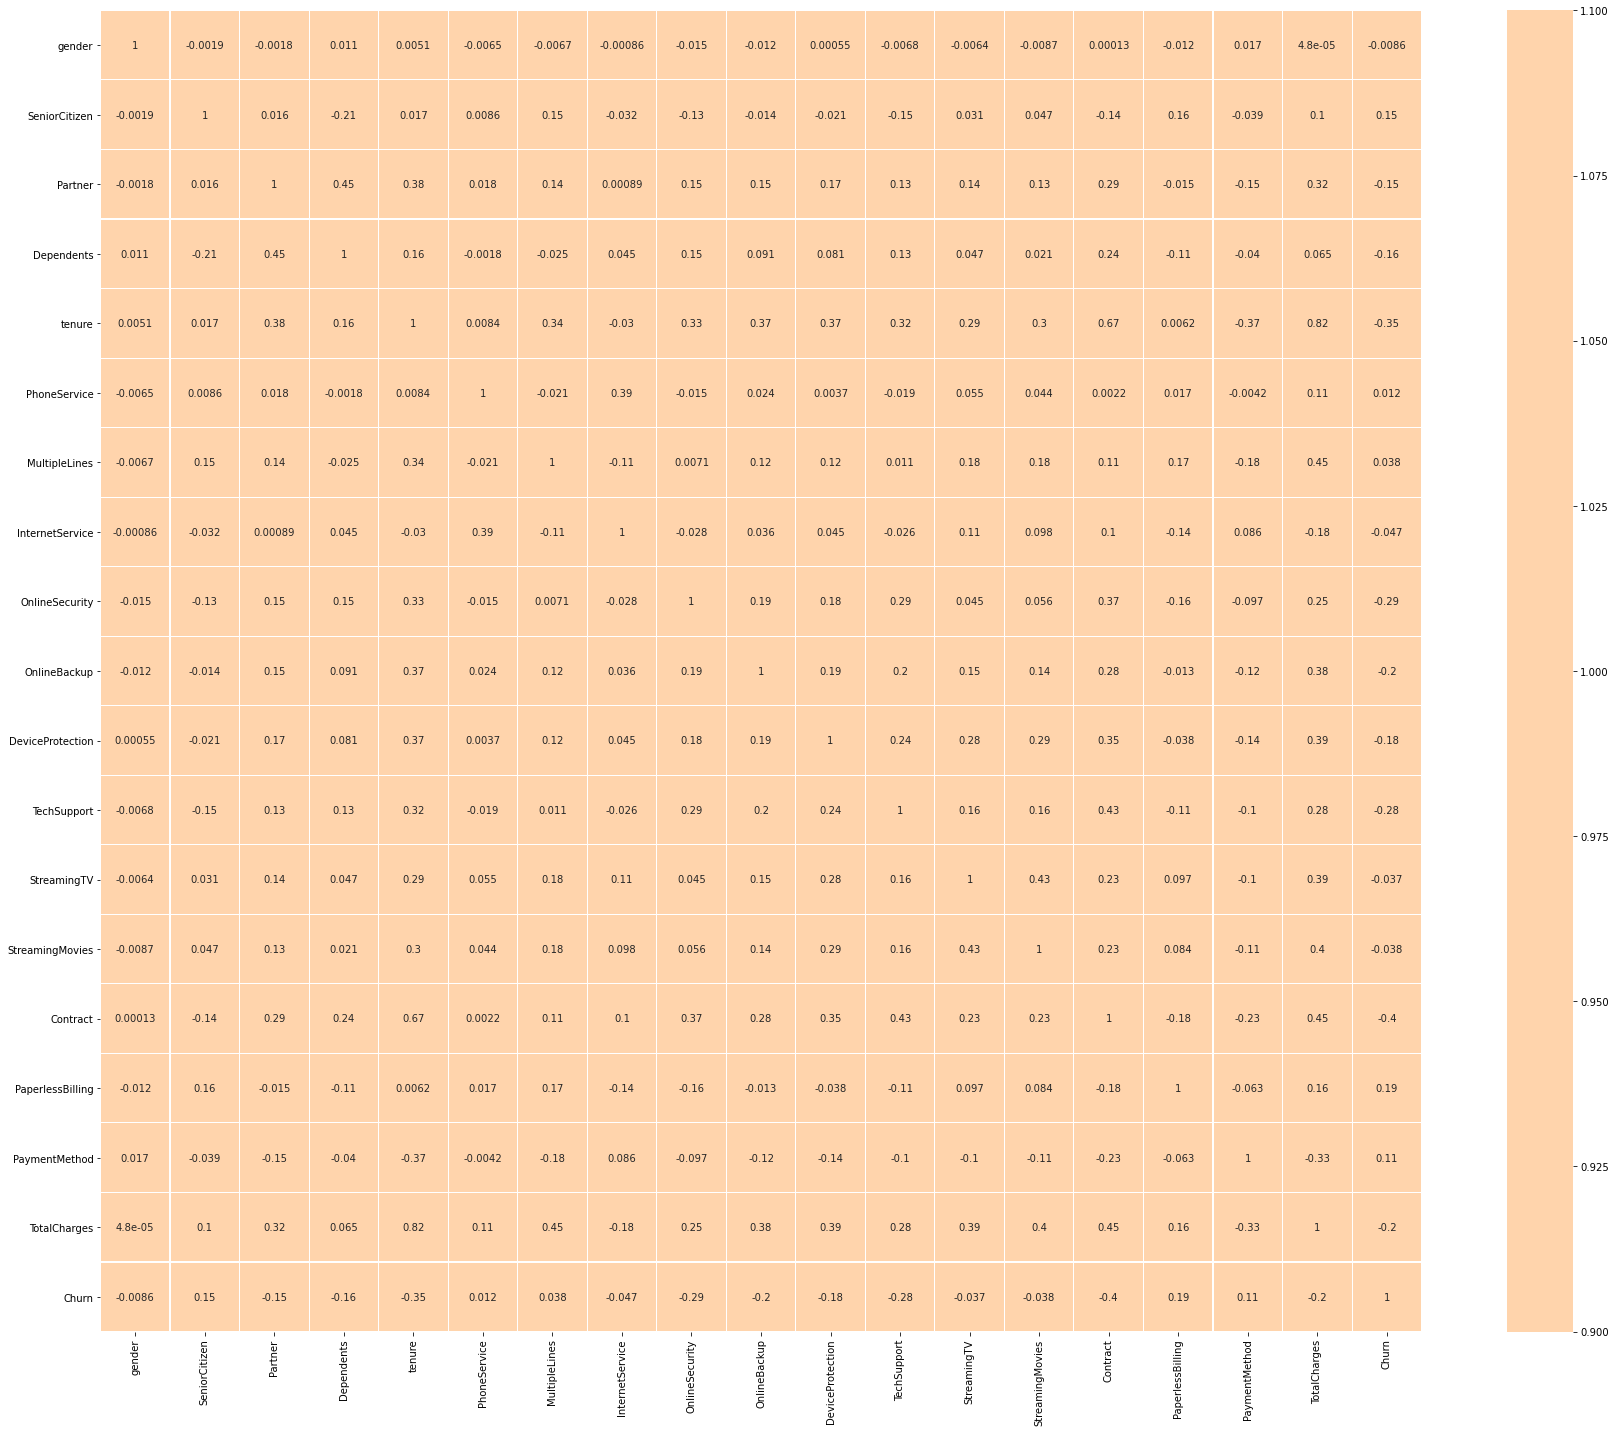

In [164]:
data_corr=data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()

In [166]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [167]:
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -0.99497138],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.17387565],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.96039939],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -0.85518222],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261, -0.87277729],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  2.01391739]])

In [168]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns
vif
# Total Charges and Tenure are highly correlated so i drop the Total Charges Column 

,vif,features
0,1.001649,gender
1,1.139129,SeniorCitizen
2,1.460734,Partner
3,1.379706,Dependents
4,5.676402,tenure
5,1.373389,PhoneService
6,1.326668,MultipleLines
7,1.549097,InternetService
8,1.252820,OnlineSecurity
9,1.214996,OnlineBackup


In [176]:
x1=x.drop('TotalCharges',axis=1)

In [189]:
scalar=StandardScaler()
X1=scalar.fit_transform(x1)
X1

array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.37127103,
        -1.20511329,  1.33486261],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [ 0.99053183,  2.27315869,  1.03453023, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.57074896,
         0.8297975 , -1.47405205]])

In [190]:
x_train.shape, x_test.shape

((5634, 17), (1409, 17))

In [191]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [195]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:- 0.2506190927140616
At random state0,the testing accuracy is:- 0.1978774975401656


At random state1,the training accuracy is:- 0.23742216942039274
At random state1,the testing accuracy is:- 0.2519451920382342


At random state2,the training accuracy is:- 0.24600274204960604
At random state2,the testing accuracy is:- 0.21589698630043075


At random state3,the training accuracy is:- 0.23425884585833823
At random state3,the testing accuracy is:- 0.26676990371957954


At random state4,the training accuracy is:- 0.24888466385123775
At random state4,the testing accuracy is:- 0.20664393037825213


At random state5,the training accuracy is:- 0.23945981477537892
At random state5,the testing accuracy is:- 0.24432167940486982


At random state6,the training accuracy is:- 0.24405782815662458
At random state6,the testing accuracy is:- 0.2261542957181668


At random state7,the training accuracy is:- 0.238308544736073
At random state7,the testing accuracy i

In [196]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=56)

In [198]:
lr.fit(x_train,y_train)

LinearRegression()

In [204]:
lr.score(x_train,y_train)

0.2365575423036479

In [205]:
pred_train=lr.predict(x_test)

In [200]:
print(r2_score(y_test,pred_test))

-0.21574267529083513


In [206]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [207]:
## We can see that Type I low
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[878, 158],
       [189, 184]], dtype=int64)

In [208]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1036
         1.0       0.54      0.49      0.51       373

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
Lr=LogisticRegression()
kn=KNeighborsClassifier()

In [211]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
Lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [212]:
## Check The Scores
dt.score(x_test,y_test)

0.7097232079489

In [213]:
rf.score(x_test,y_test)

0.7977288857345636

In [214]:
Lr.score(x_test,y_test)

0.808374733853797

In [215]:
kn.score(x_test,y_test)

0.7537260468417317

In [218]:
## Cross Validation to check overfitting
## There is no overfitting because now score is 73%
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X1,y,cv=5)
cross_val_score(knn,X1,y,cv=5).mean()

0.7532299462868572

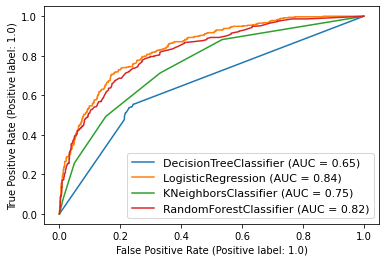

In [220]:
disp =plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(Lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [221]:
roc_auc_score(y_test,dt.predict(x_test))

0.6473340441168859

In [222]:
roc_auc_score(y_test,kn.predict(x_test))

0.6703939673108573

In [223]:
roc_auc_score(y_test,Lr.predict(x_test))

0.7109875578374237

In [224]:
roc_auc_score(y_test,rf.predict(x_test))

0.6994588901425363

In [228]:
## To Save the Model
import pickle
filename= 'churn.pickle'
pickle.dump(rf,open(filename,'wb'))

In [229]:
loaded_model=pickle.load(open('churn.pickle','rb'))
result=loaded_model.score(x_test,y_test)
result

0.7977288857345636